At First downloading the Iris Flower Dataset from Kaggle using the opendatasets library. Once the dataset is downloaded, we can explore it and use it for various data analysis.

In [26]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/arshid/iris-flower-dataset")

Skipping, found downloaded files in "./iris-flower-dataset" (use force=True to force download)


Now, loading the Iris Flower Dataset from the specified CSV file and then displays a random sample of 20 rows from the dataset using the pandas library. The dataset likely contains information about various characteristics of iris flowers, and the displayed sample provides a glimpse into the dataset's contents.

In [27]:
import pandas as pd
df=pd.read_csv('/content/iris-flower-dataset/IRIS.csv')
df.sample(20)

sepal_length  sepal_width  petal_length  petal_width          species
108           6.7          2.5           5.8          1.8   Iris-virginica
118           7.7          2.6           6.9          2.3   Iris-virginica
77            6.7          3.0           5.0          1.7  Iris-versicolor
8             4.4          2.9           1.4          0.2      Iris-setosa
115           6.4          3.2           5.3          2.3   Iris-virginica
45            4.8          3.0           1.4          0.3      Iris-setosa
19            5.1          3.8           1.5          0.3      Iris-setosa
18            5.7          3.8           1.7          0.3      Iris-setosa
67            5.8          2.7           4.1          1.0  Iris-versicolor
31            5.4          3.4           1.5          0.4      Iris-setosa
21            5.1          3.7           1.5          0.4      Iris-setosa
109           7.2          3.6           6.1          2.5   Iris-virginica
29            4.7          3.2           1.6          0.2      Iris-setosa
87            6.3          2.3           4.4          1.3  Iris-versicolor
143           6.8          3.2           5.9          2.3   Iris-virginica
28            5.2          3.4           1.4          0.2      Iris-setosa
10            5.4          3.7           1.5          0.2      Iris-setosa
91            6.1          3.0           4.6          1.4  Iris-versicolor
64            5.6          2.9           3.6          1.3  Iris-versicolor
125           7.2          3.2           6.0          1.8   Iris-virginica

Now showing whether each column contains numerical data (e.g., integers or floating-point numbers) or non-numerical data (e.g., strings or categorical variables). Understanding data types is essential for appropriate data analysis and manipulation.

In [28]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Again showing the number of non-null entries in each column, data types, and memory usage. This is a quick way to get an overview of the dataset's structure and identify missing values.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Now enableing the use of matplotlib and seaborn for data visualization and ensure that the visualizations are displayed inline.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 Creating a pairwise scatter plot matrix using Seaborn (sns), where data will be taken from the DataFrame df. Each point is colored based on the 'species' column, using the 'Set2' color palette.

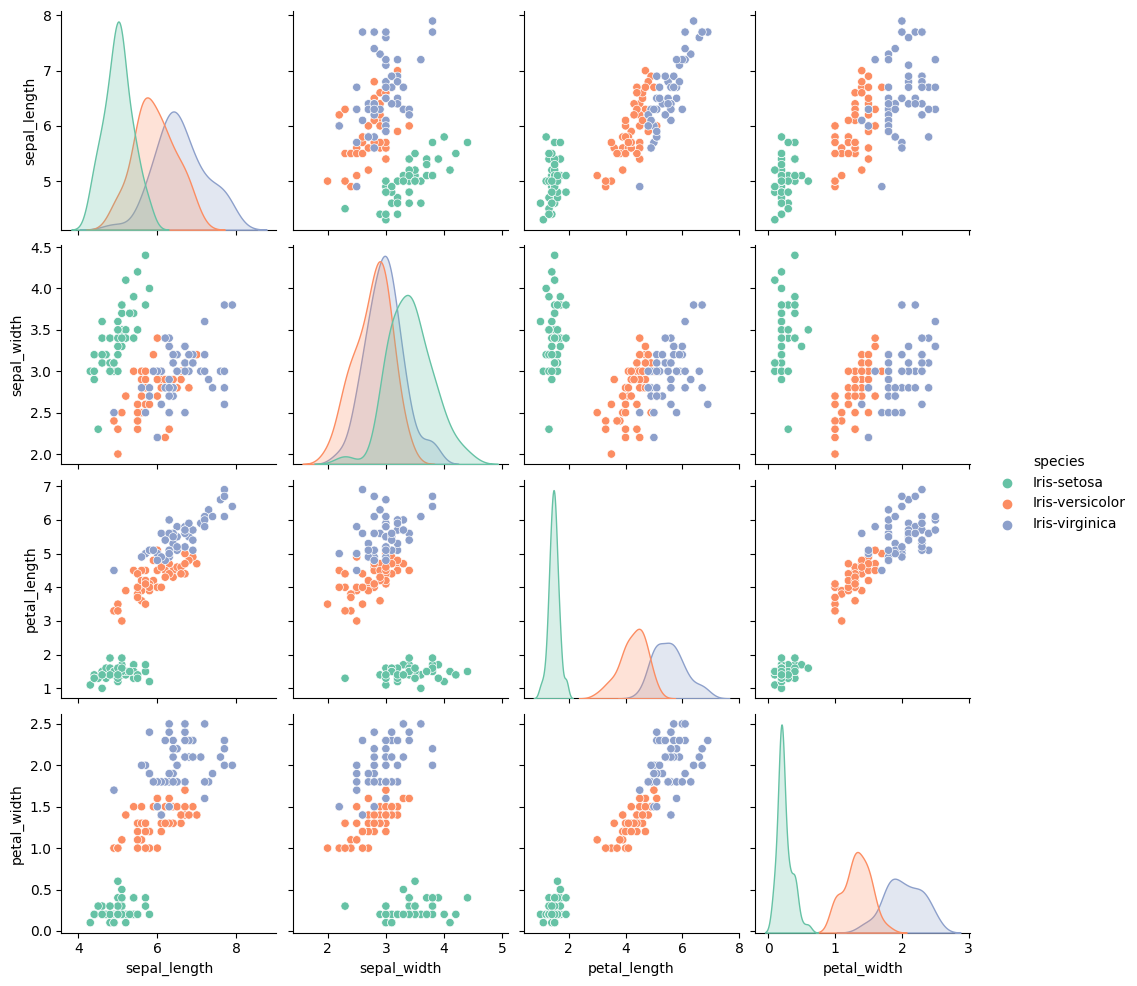

In [31]:
sns.pairplot(data=df, hue='species', palette='Set2')

Returning the unique values in the 'species' column of the DataFrame df.

In [32]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Now, `clean_df` will be created by one-hot encoding the 'species' column in the DataFrame `df` using `pd.get_dummies()`.

In [33]:
clean_df=pd.get_dummies(columns=['species'], data=df)

Displaying the first few rows of the DataFrame `clean_df`.

In [34]:
clean_df.head()

sepal_length  sepal_width  petal_length  petal_width  species_Iris-setosa  \
0           5.1          3.5           1.4          0.2                    1   
1           4.9          3.0           1.4          0.2                    1   
2           4.7          3.2           1.3          0.2                    1   
3           4.6          3.1           1.5          0.2                    1   
4           5.0          3.6           1.4          0.2                    1   

   species_Iris-versicolor  species_Iris-virginica  
0                        0                       0  
1                        0                       0  
2                        0                       0  
3                        0                       0  
4                        0                       0

`X` will be assigned to all columns from the second to the last in the DataFrame `clean_df`, and `y` is assigned the values in the sixth column.

In [35]:
X=clean_df.iloc[:, 1:]
y=clean_df.iloc[:, 5]

Now, using `train_test_split` from scikit-learn to split the data into training and testing sets. `X_train`, `X_test` are the feature sets, and `y_train`, `y_test` are the corresponding labels. The test size is set to 30% of the data.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Printing the shapes of the training feature set (`X_train`) and training label set (`y_train`).

In [37]:
X_train.shape, y_train.shape

((105, 6), (105,))

Printing the shapes of the testing feature set (`X_test`) and testing label set (`y_test`).

In [38]:
X_test.shape, y_test.shape

((45, 6), (45,))

Importing the Support Vector Classification (SVC) algorithm from scikit-learn (`SVC`) and relevant metrics for model evaluation, such as `confusion_matrix`, `accuracy_score`, `f1_score`, and `classification_report`.

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

Fiting a Support Vector Classification (SVC) model to training data, makes predictions on the test set (`X_test`), computes a confusion matrix, and displays it using `ConfusionMatrixDisplay` from scikit-learn.

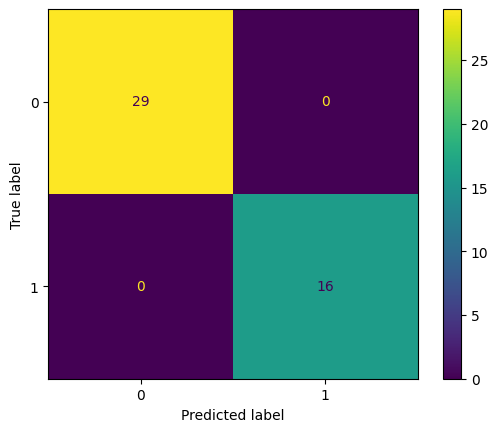

In [40]:
model= SVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred,)
disp = ConfusionMatrixDisplay(confusion_matrix=cm
                              )
disp.plot()


Printing the accuracy score for the predictions (`y_pred`) compared to the true labels (`y_test`).

In [41]:
accuracy_score(y_true=y_test, y_pred=y_pred)

1.0

Printing the f1 score for the predictions (`y_pred`) compared to the true labels (`y_test`).

In [42]:
f1_score(y_true=y_test, y_pred=y_pred)

1.0